{% cite holdgraf_evidence_2014 %}

[1]:http://www.quotedb.com/quotes/2112

In [2]:
# Init libraries
install.packages("lmtest", repos="https://cran.wu.ac.at/")
install.packages("vcd", repos="https://cran.wu.ac.at/")
install.packages("ggplot2", repos="https://cran.wu.ac.at/")
install.packages("stablelearner", repos="https://cran.wu.ac.at/")
library(vcd)
library(ggplot2)

package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aon91\AppData\Local\Temp\RtmpWiXanr\downloaded_packages
package 'vcd' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aon91\AppData\Local\Temp\RtmpWiXanr\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aon91\AppData\Local\Temp\RtmpWiXanr\downloaded_packages
package 'stablelearner' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aon91\AppData\Local\Temp\RtmpWiXanr\downloaded_packages


Warning message:
"package 'vcd' was built under R version 3.6.2"Loading required package: grid
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [3]:
# Load dataset
#ti <- read.csv("../datasets/titanic.csv", header = TRUE, sep=",")
#ti$Who <- "NA"
#ti$Who[ti$Sex=="male"] <- "man"
#ti$Who[ti$Sex=="female"] <- "woman"
#ti$Who[ti$Age<18] <- "child"
# Titanic filtered
#ti <- ti[!(is.na(ti$Cabin) | ti$Cabin=="" | ti$Embarked=="" | is.na(ti$PassengerId) | is.na(ti$Survived) |
#           is.na(ti$Pclass) |  ti$Ticket=="Name" |is.na(ti$Age) | ti$Ticket=="" | ti$Sex=="" ), ]
# Full titanic dataset: https://rdrr.io/cran/stablelearner/man/titanic.html
# Includes crew, which is needed or the simpson paradoxon
data("titanic", package = "stablelearner")
ti <- titanic

ti$who <- "NA"
ti$sex=ti$gender
ti$who[ti$sex=="male"] <- "man"
ti$who[ti$sex=="female"] <- "woman"
ti$who[ti$age<18] <- "child"
#ti <- ti[!( ti$name=="" | ti$gender=="" | is.na(ti$age) | ti$class=="" | ti$embarked=="" |
#           ti$survived=="" | ti$country=="" | is.na(ti$ticketno) | is.na(ti$fare) | 
#           is.na(ti$sibsp) | is.na(ti$parch)), ]
ti <- ti[!( ti$class=="" | ti$survived==""),]
#ti <- ti[!(is.na(ti$Cabin) | ti$Cabin=="" | ti$Embarked=="" | is.na(ti$PassengerId) | is.na(ti$survived) |
#           is.na(ti$Pclass) |  ti$Ticket=="Name" |is.na(ti$age) | ti$ticketno=="" | ti$gender=="" ), ]

### 1. Lade den Datensatz Titanic in R. Beschreibe die Daten anhand der internen Hilfe (hilfreiche R Befehle: ?, help() )
 

In [4]:
help(ti)
str(ti)


'data.frame':	2207 obs. of  13 variables:
 $ name    : chr  "Abbing, Mr. Anthony" "Abbott, Mr. Eugene Joseph" "Abbott, Mr. Rossmore Edward" "Abbott, Mrs. Rhoda Mary 'Rosa'" ...
 $ gender  : Factor w/ 2 levels "female","male": 2 2 2 1 1 2 2 1 2 2 ...
 $ age     : num  42 13 16 39 16 25 30 28 27 20 ...
 $ class   : Factor w/ 7 levels "1st","2nd","3rd",..: 3 3 3 3 3 3 2 2 3 3 ...
 $ embarked: Factor w/ 4 levels "B","C","Q","S": 4 4 4 4 4 4 2 2 2 4 ...
 $ country : Factor w/ 48 levels "Argentina","Australia",..: 44 44 44 15 30 44 17 17 26 16 ...
 $ ticketno: int  5547 2673 2673 2673 348125 348122 3381 3381 2699 3101284 ...
 $ fare    : num  7.11 20.05 20.05 20.05 7.13 ...
 $ sibsp   : Ord.factor w/ 9 levels "0"<"1"<"2"<"3"<..: 1 1 2 2 1 1 2 2 1 1 ...
 $ parch   : Ord.factor w/ 10 levels "0"<"1"<"2"<"3"<..: 1 3 2 2 1 1 1 1 1 1 ...
 $ survived: Factor w/ 2 levels "no","yes": 1 1 1 2 2 2 1 2 2 2 ...
 $ who     : chr  "man" "child" "child" "woman" ...
 $ sex     : Factor w/ 2 levels "female","

No documentation for 'ti' in specified packages and libraries:
you could try '??ti'

### 2. Untersuche den Titanic Datensatz mithilfe von Tabellen von absoluten und relativen Häufigkeiten der Ränder heruntergebrochen auf je 2 oder 3 Dimensionen von Variablen. (hilfreiche R Befehle: table(), ftable(), colSums, rowSums(), apply(), xtable())

In [5]:
invisible(table(ti$age, ti$fare))

### 3. Stelle die Daten in geeigneter Weise graphisch dar (hilfreiche R Befehle: barplot(), mosaicplot(), assocplot())

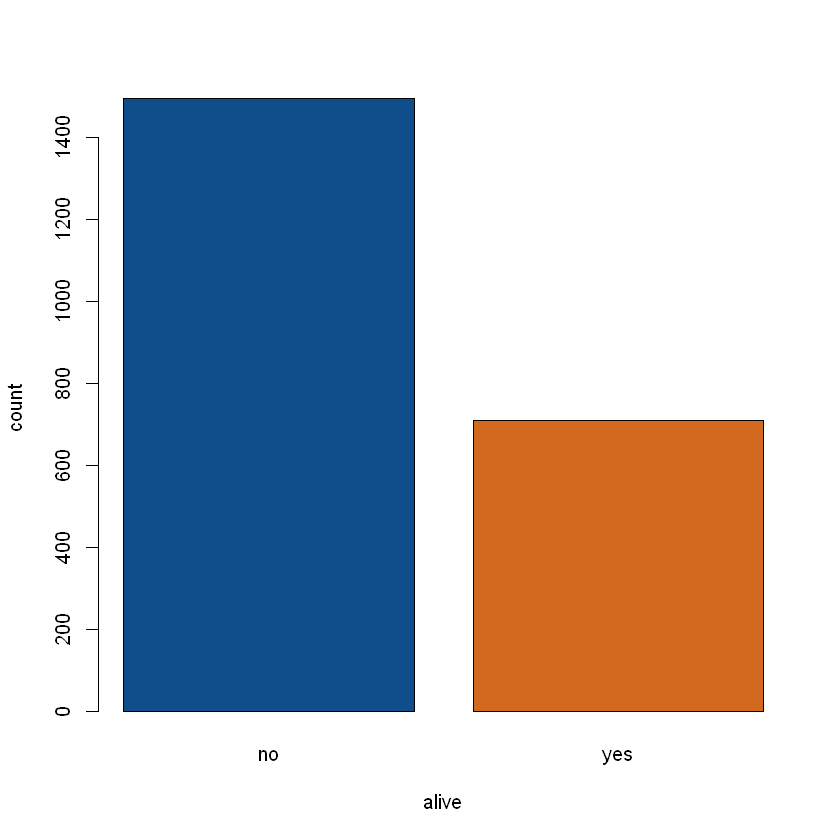

In [6]:
# Countplots in R: https://www.statmethods.net/graphs/bar.html
# Create counts from alive column
counts <- table(ti$survived)
barplot(counts, col=c("dodgerblue4", "chocolate"), xlab="alive", ylab="count")

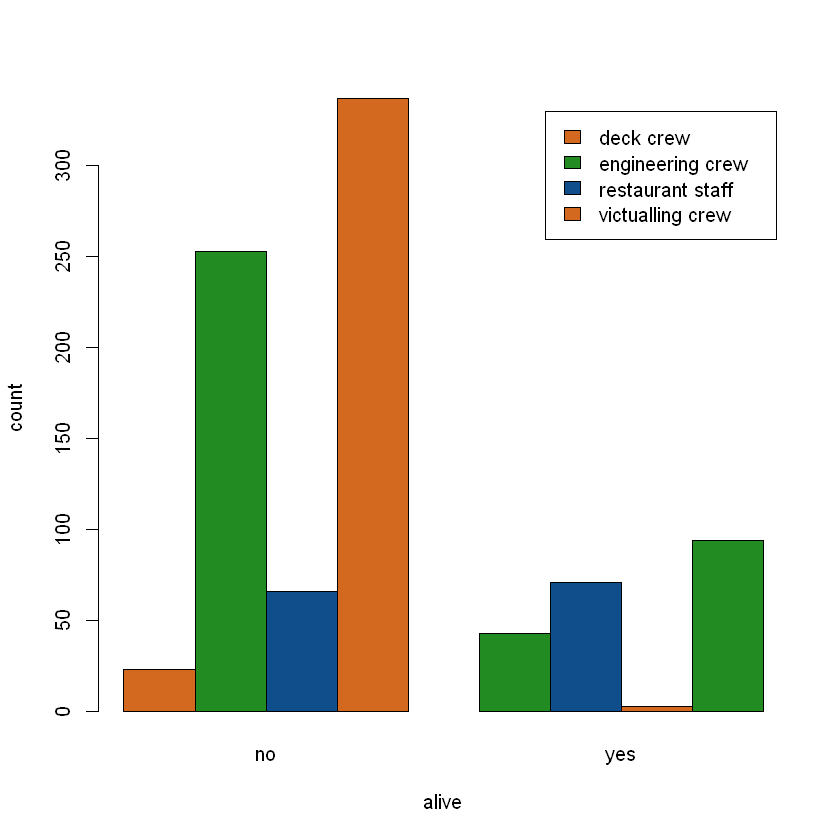

[1] 0

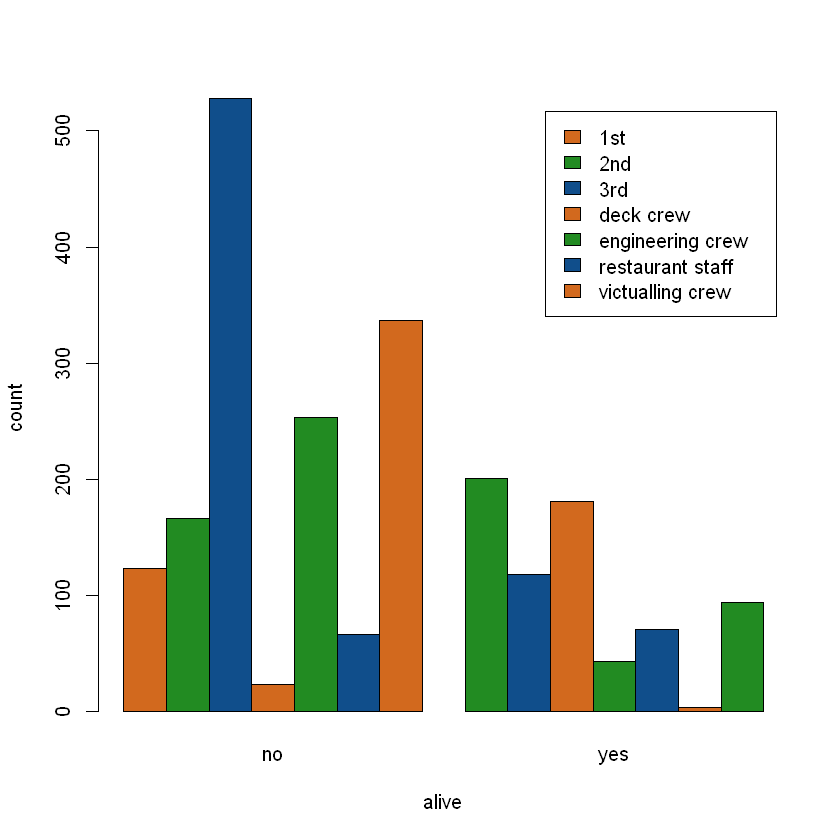

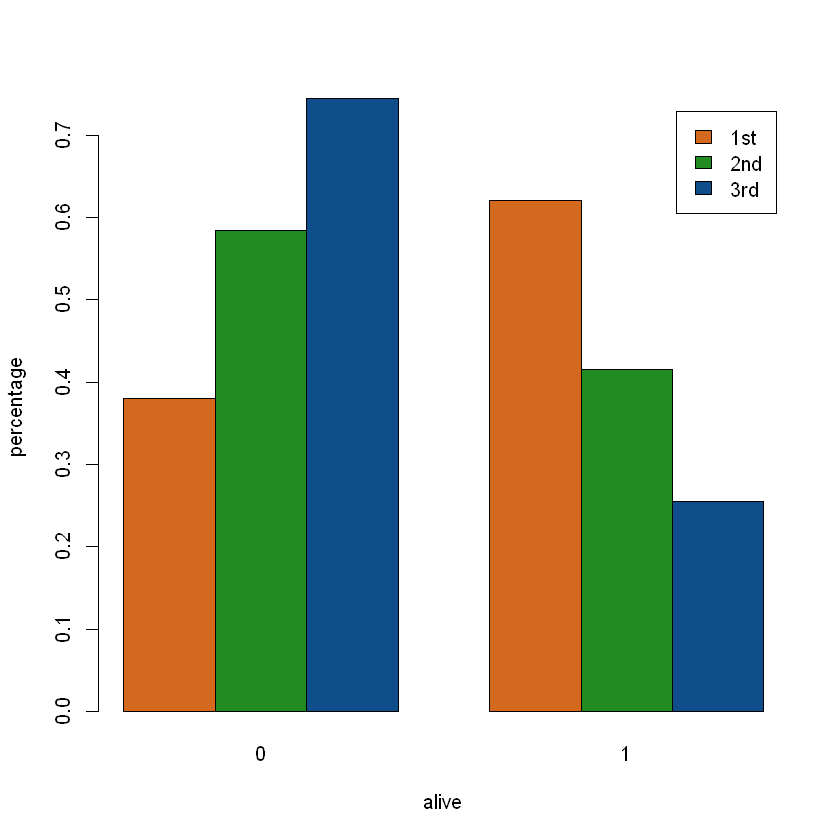

In [28]:
# Form a table with columns class and rows alive
counts <- table(ti$class[grepl("crew", ti$class) | grepl("staff", ti$class)],
                ti$survived[grepl("crew", ti$class) | grepl("staff", ti$class)])
# Delete unused rows
# Source: https://stackoverflow.com/questions/37307307/remove-a-row-from-a-data-table-in-r
counts <- counts[-1:-3,]
# Order like seaborn: https://stackoverflow.com/a/56808968
barplot(counts, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(counts), beside=TRUE, xlab="alive", ylab="count"
)

counts <- table(ti$class, ti$survived)
# Order like seaborn: https://stackoverflow.com/a/56808968
barplot(counts, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(counts), beside=TRUE, xlab="alive", ylab="count"
)

# Make a table from matrix 
# https://www.dummies.com/programming/r/how-to-create-a-two-way-data-table-with-r/
length(ti$class[ti$class=="1st" & ti$survived==0]) / length(ti$class[ti$class=="1st"])
percentages <- matrix(c(
    length(ti$class[ti$class=="1st" & ti$survived=="no"]) / length(ti$class[ti$class=="1st"]),
    length(ti$class[ti$class=="2nd" & ti$survived=="no"]) / length(ti$class[ti$class=="2nd"]),
    length(ti$class[ti$class=="3rd" & ti$survived=="no"]) / length(ti$class[ti$class=="3rd"]),
    length(ti$class[ti$class=="1st" & ti$survived=="yes"]) / length(ti$class[ti$class=="1st"]),
    length(ti$class[ti$class=="2nd" & ti$survived=="yes"]) / length(ti$class[ti$class=="2nd"]),
    length(ti$class[ti$class=="3rd" & ti$survived=="yes"]) / length(ti$class[ti$class=="3rd"])
), ncol=2)
colnames(percentages) <- c(0, 1)
rownames(percentages) <- c("1st", "2nd", "3rd")
percentages <- as.table(percentages)

barplot(percentages, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(percentages), beside=TRUE, xlab="alive", ylab="percentage"
)

### 4. Begründe anhand der quantitativen Ergebnisse, ob Frauen und Kinder zuerst bei der Seenotrettung berücksichtigt wurden.

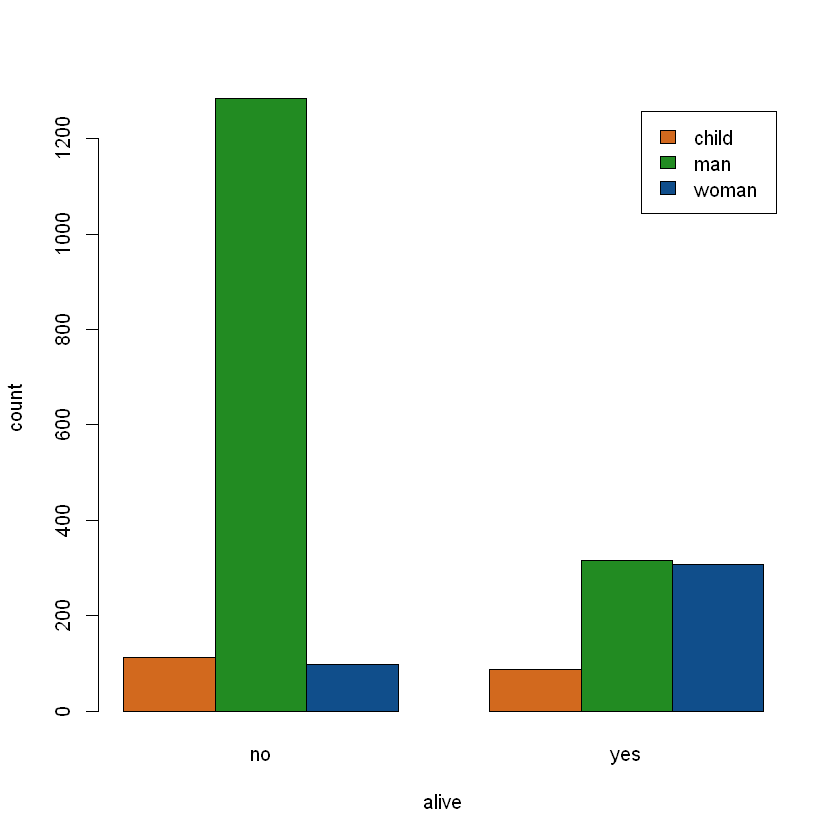

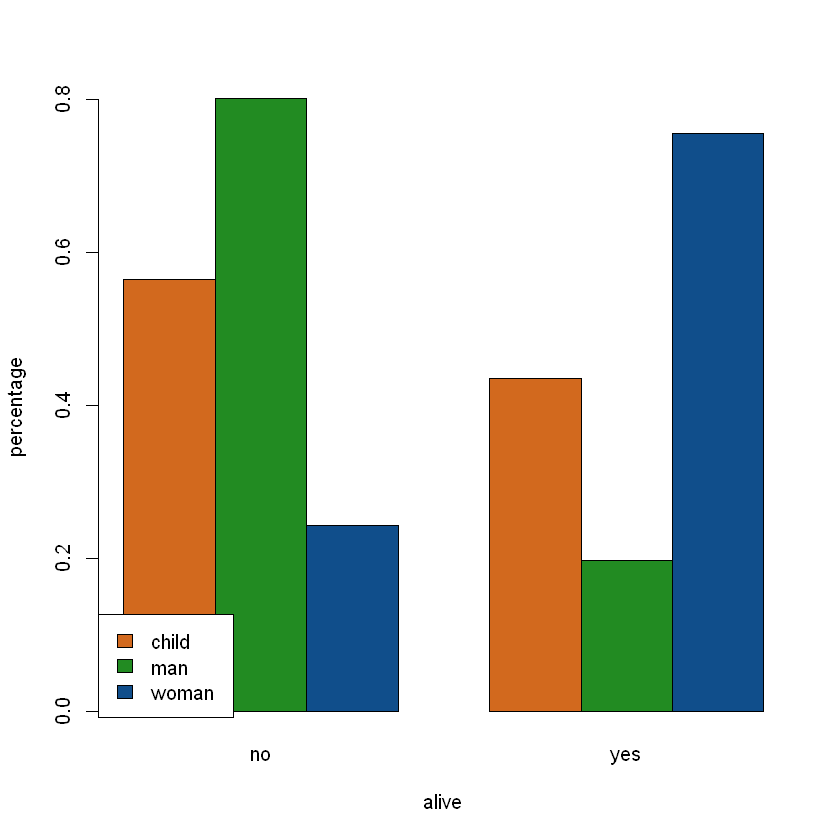

In [29]:
# Form a table with columns class and rows alive
counts <- table(ti$who, ti$survived)
# Order like seaborn: https://stackoverflow.com/a/56808968
barplot(counts, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(counts), beside=TRUE, xlab="alive", ylab="count"
)

# Make a table from matrix 
# https://www.dummies.com/programming/r/how-to-create-a-two-way-data-table-with-r/
percentages <- matrix(c(
    length(ti$who[ti$who=="child" & ti$survived=="no"]) / length(ti$who[ti$who=="child"]),
    length(ti$who[ti$who=="man" & ti$survived=="no"]) / length(ti$who[ti$who=="man"]),
    length(ti$who[ti$who=="woman" & ti$survived=="no"]) / length(ti$who[ti$who=="woman"]),
    length(ti$who[ti$who=="child" & ti$survived=="yes"]) / length(ti$who[ti$who=="child"]),
    length(ti$who[ti$who=="man" & ti$survived=="yes"]) / length(ti$who[ti$who=="man"]),
    length(ti$who[ti$who=="woman" & ti$survived=="yes"]) / length(ti$who[ti$who=="woman"])
), ncol=2)
colnames(percentages) <- c("no", "yes")
rownames(percentages) <- c("child", "man", "woman")
percentages <- as.table(percentages)
barplot(percentages, col=c("chocolate", "forestgreen", "dodgerblue4"),
    beside=TRUE, xlab="alive", ylab="percentage"
)
legend("bottomleft", legend=rownames(percentages), fill=c("chocolate", "forestgreen", "dodgerblue4"))


Frauen haben die höchste Überlebensrate, somit ist die Vermutung, dass diese zuerst bei der Rettung berücksichtigt wurden, ziemlich nahe liegend. Für Kinder wird dies wahrscheinlich auch zutreffen, jedoch sind Kinder, vorallem Kleinkinder, auf die Hilfe anderer angewiesen, weil sie z.B. nicht schwimmen können, was ihre Überlebensrate drastisch reduziert.

### 5. Erkläre, wo sich Anzeichen für Simpson's Paradoxon finden lassen.

Betrachtet man die Überlebensrate der verschiedenen Klassen und der Crew gesondert an, erkennt man, dass die Überlebensrate der dritten Passagier-Klasse nur leicht über der der Crew ist.

         alive
1st  0.6203704
2nd  0.4154930
3rd  0.2552891
crew 0.2370787

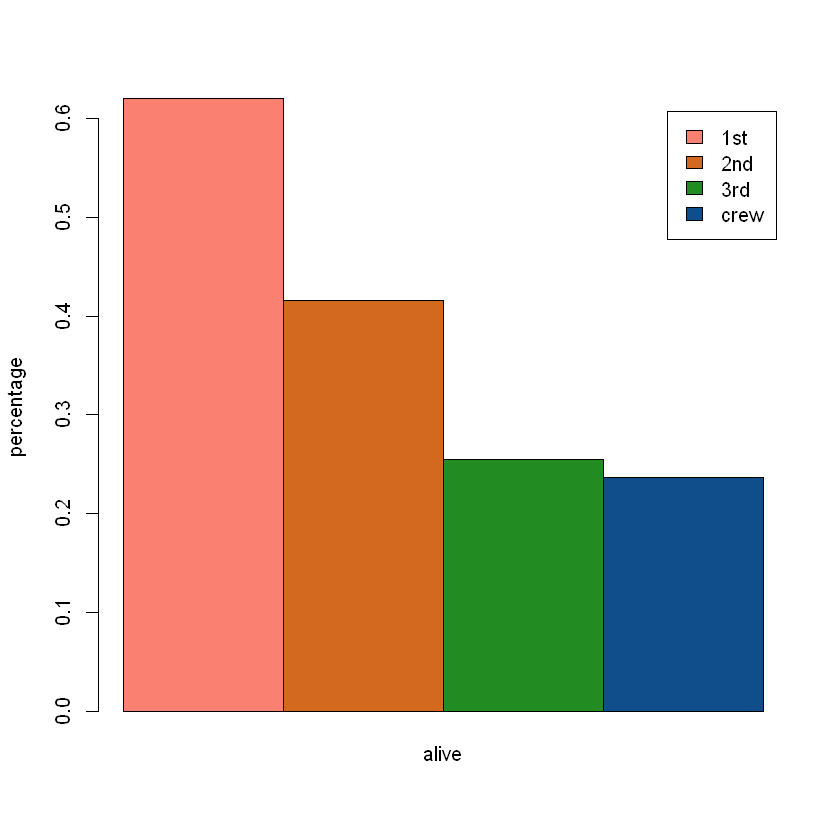

In [40]:
percentages <- matrix(c(
    length(ti$survived[ti$survived=="yes" & ti$class=="1st"]) /
                   length(ti$survived[ti$class=="1st"]),
    length(ti$survived[ti$survived=="yes" & ti$class=="2nd"]) /
                   length(ti$survived[ti$class=="2nd"]),
    length(ti$survived[ti$survived=="yes" & ti$class=="3rd"]) /
                   length(ti$survived[ti$class=="3rd"]),
    length(ti$survived[ti$survived=="yes" & (grepl("crew", ti$class) | grepl("staff", ti$class))]) /
                   length(ti$survived[grepl("crew", ti$class) | grepl("staff", ti$class)])  
), ncol=1)
rownames(percentages) <- c("1st", "2nd", "3rd", "crew")
colnames(percentages) <- c("alive")

percentages <- as.table(percentages)
percentages

barplot(percentages, col=c("salmon", "chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(percentages), beside=TRUE, ylab="percentage"
)

Wenn man jedoch die Überlebensrate der dritten Klasse und Crew auf Geschlecht aufteilt, fällt einem auf, dass in beiden Fällen die Crew auf einmal die besseren Überlebensrate besitzt.

                alive
Third Class 0.1521298
Crew        0.2202999

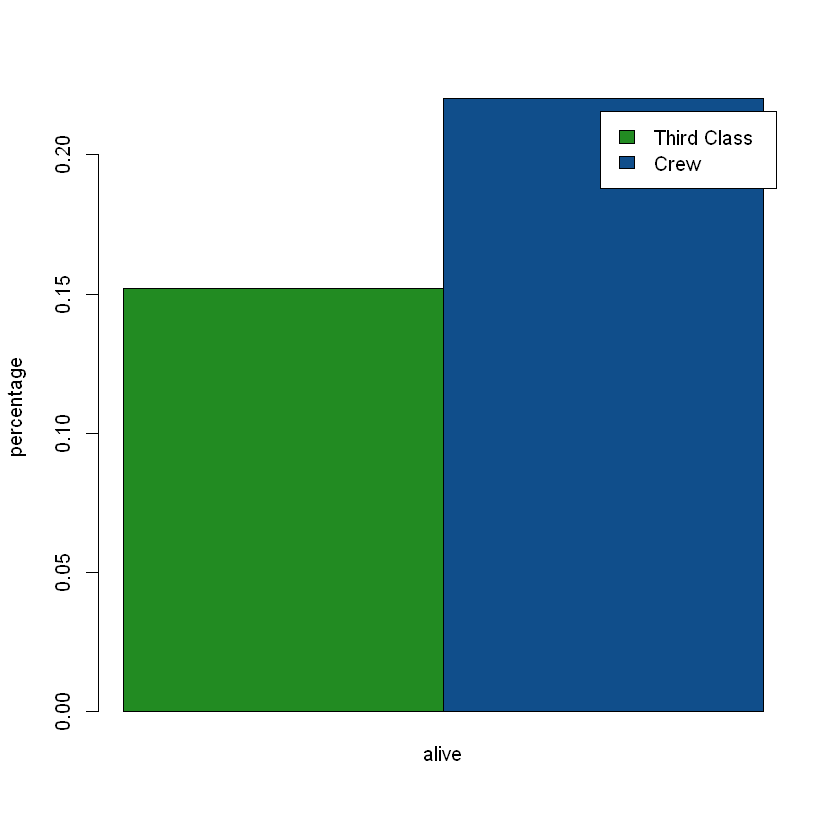

In [39]:
male <- matrix(c(
    length(ti$survived[ti$survived=="yes" & ti$class=="3rd" & ti$gender=="male"]) /
        length(ti$survived[ti$gender=="male" & ti$class=="3rd"]),
    length(ti$survived[ti$survived=="yes" & ti$gender=="male" & (grepl("crew", ti$class) | grepl("staff", ti$class))]) /
        length(ti$survived[ti$gender=="male" & (grepl("crew", ti$class) | grepl("staff", ti$class))])
))
rownames(male) <- c("Third Class", "Crew")
colnames(male) <- c("alive")
male <- as.table(male)
male

barplot(male, col=c("forestgreen", "dodgerblue4"),
    legend = rownames(male), beside=TRUE, ylab="percentage"
)

                alive
Third Class 0.4907407
Crew        0.8695652

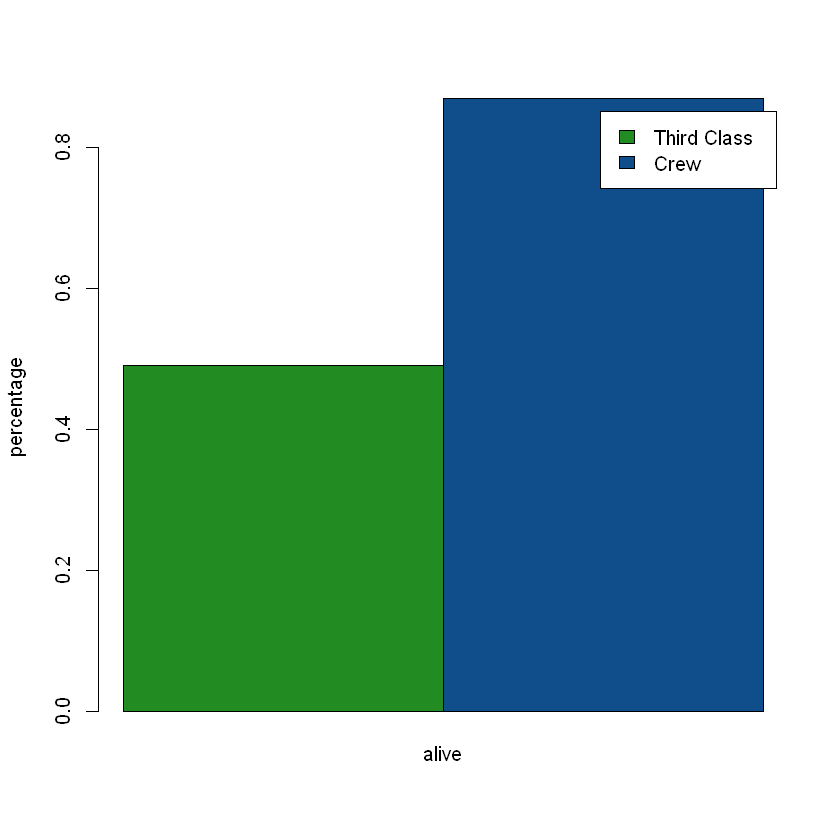

In [47]:
female <- matrix(c(
    length(ti$survived[ti$survived=="yes" & ti$class=="3rd" & ti$gender=="female"]) /
        length(ti$survived[ti$gender=="female" & ti$class=="3rd"]),
    length(ti$survived[ti$survived=="yes" & ti$gender=="female" & (grepl("crew", ti$class) | grepl("staff", ti$class))]) /
        length(ti$survived[ti$gender=="female" & (grepl("crew", ti$class) | grepl("staff", ti$class))])
))
rownames(female) <- c("Third Class", "Crew")
colnames(female) <- c("alive")
female <- as.table(female)
female

barplot(female, col=c("forestgreen", "dodgerblue4"),
    legend = rownames(female), beside=TRUE, ylab="percentage"
)

In [55]:
full <- matrix(c(
    length(ti$survived[ti$survived=="yes" & ti$class=="3rd" & ti$gender=="male"]),
    length(ti$survived[ti$survived=="yes" & ti$gender=="male" & (grepl("crew", ti$class) | grepl("staff", ti$class))]),
    length(ti$survived[ti$survived=="no" & ti$class=="3rd" & ti$gender=="male"]),
    length(ti$survived[ti$survived=="no" & ti$gender=="male" & (grepl("crew", ti$class) | grepl("staff", ti$class))]),
    length(ti$survived[ti$survived=="yes" & ti$class=="3rd" & ti$gender=="female"]),
    length(ti$survived[ti$survived=="yes" & ti$gender=="female" & (grepl("crew", ti$class) | grepl("staff", ti$class))]),
    length(ti$survived[ti$survived=="no" & ti$class=="3rd" & ti$gender=="female"]),
    length(ti$survived[ti$survived=="no" & ti$gender=="female" & (grepl("crew", ti$class) | grepl("staff", ti$class))])
), ncol=4)
rownames(full) <- c("Third Class", "Crew")
colnames(full) <- c("Male Survived", "Male Died", "Female Survived", "Female Died")
full <- as.table(full)
full
 

            Male Survived Male Died Female Survived Female Died
Third Class            75       418             106         110
Crew                  191       676              20           3

Man sieht, dass es absolut mehr Männer in der Crew gab als in der dritten Klasse. Umgekehrt verhält sich dies bei den Frauen. 

Da Männer allgemein eine schlechtere Überlebensrate als Frauen hatten und die Crew hauptächlich aus Männer bestand, ergab sich der Eindruck, dass die Crew eine schlechtere Überlebensrate als die Passagiere der dritten Klasse hatte. 

Vergleicht man die Daten auf Männer und Frauen aufgeteilt, so erhält man ein anderes Bild.
Dieses Paradoxon, bei dem die Wahrscheinlichkeit verschieden ausfällt, je nachdem man die Werte gruppiert oder nicht betrachtet, nennt man Simpson-Paradoxon. {% cite simpson %}


### 6. Lade den Datensatz 'state.x77' in R. Beschreibe die Daten anhand der internen Hilfe.

In [10]:
?state.x77

state {datasets},R Documentation


### 7. Ermittle mithilfe geeigneter Schätzer für die Lage und Streuung der ersten 5 Variablen, Population, Income, Illiteracy, Life Exp(ectancy) und Murder.

In [11]:
state.x77[,'Population']
state.x77[,'Income']
state.x77[,'Illiteracy']
state.x77[,'Life Exp']
state.x77[,'Murder']

Alabama         Alaska        Arizona       Arkansas     California 
          3615            365           2212           2110          21198 
      Colorado    Connecticut       Delaware        Florida        Georgia 
          2541           3100            579           8277           4931 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
           868            813          11197           5313           2861 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
          2280           3387           3806           1058           4122 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
          5814           9111           3921           2341           4767 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
           746           1544            590            812           7333 
    New Mexico       New York North Carolina   North Dakota           Ohio 
          1144          18076           5441            637          10735 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
          2715           2284          11860            931           2816 
  South Dakota      Tennessee          Texas           Utah        Vermont 
           681           4173          12237           1203            472 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
          4981           3559           1799           4589            376

Alabama         Alaska        Arizona       Arkansas     California 
          3624           6315           4530           3378           5114 
      Colorado    Connecticut       Delaware        Florida        Georgia 
          4884           5348           4809           4815           4091 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
          4963           4119           5107           4458           4628 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
          4669           3712           3545           3694           5299 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
          4755           4751           4675           3098           4254 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
          4347           4508           5149           4281           5237 
    New Mexico       New York North Carolina   North Dakota           Ohio 
          3601           4903           3875           5087           4561 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
          3983           4660           4449           4558           3635 
  South Dakota      Tennessee          Texas           Utah        Vermont 
          4167           3821           4188           4022           3907 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
          4701           4864           3617           4468           4566

Alabama         Alaska        Arizona       Arkansas     California 
           2.1            1.5            1.8            1.9            1.1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
           0.7            1.1            0.9            1.3            2.0 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
           1.9            0.6            0.9            0.7            0.5 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
           0.6            1.6            2.8            0.7            0.9 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
           1.1            0.9            0.6            2.4            0.8 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
           0.6            0.6            0.5            0.7            1.1 
    New Mexico       New York North Carolina   North Dakota           Ohio 
           2.2            1.4            1.8            0.8            0.8 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
           1.1            0.6            1.0            1.3            2.3 
  South Dakota      Tennessee          Texas           Utah        Vermont 
           0.5            1.7            2.2            0.6            0.6 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
           1.4            0.6            1.4            0.7            0.6

Alabama         Alaska        Arizona       Arkansas     California 
         69.05          69.31          70.55          70.66          71.71 
      Colorado    Connecticut       Delaware        Florida        Georgia 
         72.06          72.48          70.06          70.66          68.54 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
         73.60          71.87          70.14          70.88          72.56 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
         72.58          70.10          68.76          70.39          70.22 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
         71.83          70.63          72.96          68.09          70.69 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
         70.56          72.60          69.03          71.23          70.93 
    New Mexico       New York North Carolina   North Dakota           Ohio 
         70.32          70.55          69.21          72.78          70.82 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
         71.42          72.13          70.43          71.90          67.96 
  South Dakota      Tennessee          Texas           Utah        Vermont 
         72.08          70.11          70.90          72.90          71.64 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
         70.08          71.72          69.48          72.48          70.29

Alabama         Alaska        Arizona       Arkansas     California 
          15.1           11.3            7.8           10.1           10.3 
      Colorado    Connecticut       Delaware        Florida        Georgia 
           6.8            3.1            6.2           10.7           13.9 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
           6.2            5.3           10.3            7.1            2.3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
           4.5           10.6           13.2            2.7            8.5 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
           3.3           11.1            2.3           12.5            9.3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
           5.0            2.9           11.5            3.3            5.2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
           9.7           10.9           11.1            1.4            7.4 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
           6.4            4.2            6.1            2.4           11.6 
  South Dakota      Tennessee          Texas           Utah        Vermont 
           1.7           11.0           12.2            4.5            5.5 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
           9.5            4.3            6.7            3.0            6.9

### 8. Stelle die Daten der ersten 5 Variablen, Population, Income, Illiteracy, Life Exp(ectancy) und Murder in geeigneter Weise graphisch dar. Verwende dafür wenigstens 2 unterschiedliche graphische Darstellungen.

### 9. Begründe anhand der graphischen Darstellung, ob es sich symmetrische oder schiefe Datenverteilungen handelt. Begründe anhand der graphischen Darstellungen, ob schwere oder leichte Ränder vorliegen (und auf welcher Seite).

### 10. Bestimme anhand graphischen Darstellungen aus Punkt 8. und der Erkenntnisse aus 9., ob Ausreißer vorliegen und welche Punkte dies sind.

{% bibliography --cited %}